# 1. Install Dependencies and Setup

In [22]:
import tensorflow as tf

In [23]:

import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import layers

In [24]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [25]:
tf.config.list_physical_devices('GPU')

[]

In [26]:
os.environ["CUDA_VISIBLE_DEVICES"] = "cpu"

# 2. Remove dodgy images

In [27]:
data_dir = 'full_dataset/train_data' 

In [28]:
image_exts = ['jpeg','jpg']

# 3. Load Data

In [29]:
data = image_dataset_from_directory(data_dir,batch_size=32)

Found 64000 files belonging to 2 classes.


In [30]:
data_iterator = data.as_numpy_iterator()

2023-07-25 13:57:22.616645: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [64000]
	 [[{{node Placeholder/_4}}]]
2023-07-25 13:57:22.617356: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [64000]
	 [[{{node Placeholder/_0}}]]


# 4. Scale Data

In [31]:
data = data.map(lambda x,y: (x/255, y))


#data.as_numpy_iterator().next()



# 5. Split Data

In [32]:
train_size = int(len(data)*.9)
val_size = int(len(data)*.1)

In [33]:
train_size

1800

In [34]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

# 6. Build Deep Learning Model

In [35]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [36]:
model = Sequential()
model.add(layers.Conv2D(16, (3,3), 1,padding='same',  activation='relu', input_shape=(256,256,3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, (3,3), 1,padding='same',  activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, (3,3), 1,padding='same',  activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])           

In [37]:
model = Sequential()
model.add(layers.Conv2D(16, (3,3), 1, padding='same', activation='relu', input_shape=(256,256,3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, (3,3), 1, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, (3,3), 1, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(128, (3,3), 1, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(256, (3,3), 1, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# 7. Train

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 64)      

In [39]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

In [40]:
hist = model.fit(train, epochs=7, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/7


2023-07-25 13:57:41.374910: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [64000]
	 [[{{node Placeholder/_4}}]]
2023-07-25 13:57:41.375566: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [64000]
	 [[{{node Placeholder/_4}}]]


1800/1800 [==============================] - ETA: 0s - loss: 0.6294 - accuracy: 0.5995

2023-07-25 14:04:22.334176: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [64000]
	 [[{{node Placeholder/_0}}]]
2023-07-25 14:04:22.335021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [64000]
	 [[{{node Placeholder/_4}}]]


1800/1800 [==============================] - 444s 246ms/step - loss: 0.6294 - accuracy: 0.5995 - val_loss: 0.4688 - val_accuracy: 0.7848
Epoch 2/7
1800/1800 [==============================] - 443s 246ms/step - loss: 0.4126 - accuracy: 0.8205 - val_loss: 0.3644 - val_accuracy: 0.8467
Epoch 3/7
1800/1800 [==============================] - 444s 247ms/step - loss: 0.3493 - accuracy: 0.8531 - val_loss: 0.3219 - val_accuracy: 0.8670
Epoch 4/7
1800/1800 [==============================] - 444s 247ms/step - loss: 0.2990 - accuracy: 0.8760 - val_loss: 0.2731 - val_accuracy: 0.8853
Epoch 5/7
1800/1800 [==============================] - 440s 244ms/step - loss: 0.2508 - accuracy: 0.8974 - val_loss: 0.2162 - val_accuracy: 0.9128
Epoch 6/7
1800/1800 [==============================] - 438s 243ms/step - loss: 0.1994 - accuracy: 0.9194 - val_loss: 0.2220 - val_accuracy: 0.9067
Epoch 7/7
1800/1800 [==============================] - 439s 244ms/step - loss: 0.1579 - accuracy: 0.9375 - val_loss: 0.1614 - va

# 8. Plot Performance

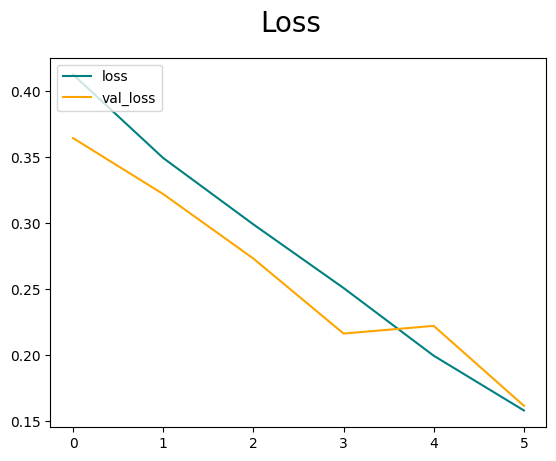

In [41]:
fig = plt.figure()
plt.plot(hist.history['loss'][1:], color='teal', label='loss')
plt.plot(hist.history['val_loss'][1:], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

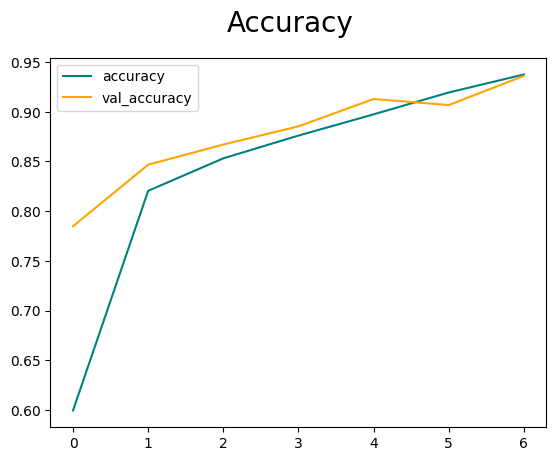

In [42]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 11. Save the Model

In [43]:
model.save(os.path.join('models','test_64000_7_5l.h5'))